<a href="https://colab.research.google.com/github/Anupa-123/GTD-Data-Analysis/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



**Mount the drive and import the dataset.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading csv file
data= pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding = "ISO-8859-1")

**Understand more abount the data.**

In [19]:
# Copy the data for backup
df = data.copy()

In [5]:
# Checking of records of the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Checking bottom records in the dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [33]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [39]:
df.rename(columns={'Rented Bike Count': 'RentedBikeCount','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility',
 'Dew point temperature(°C)': 'DewPointTemperature', 'Solar Radiation (MJ/m2)':'SolarRadiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
 'Functioning Day':'FunctioningDay','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [40]:
len(df.Date.unique())

365

In [41]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [42]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [44]:
df.FunctioningDay.value_counts()

Yes    8465
No      295
Name: FunctioningDay, dtype: int64

In [38]:
# Data shape
df.shape

(8760, 14)

The dataset contains 8760 rows and 14 columns.

In [9]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# Statistical info 
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [12]:
# Print the unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

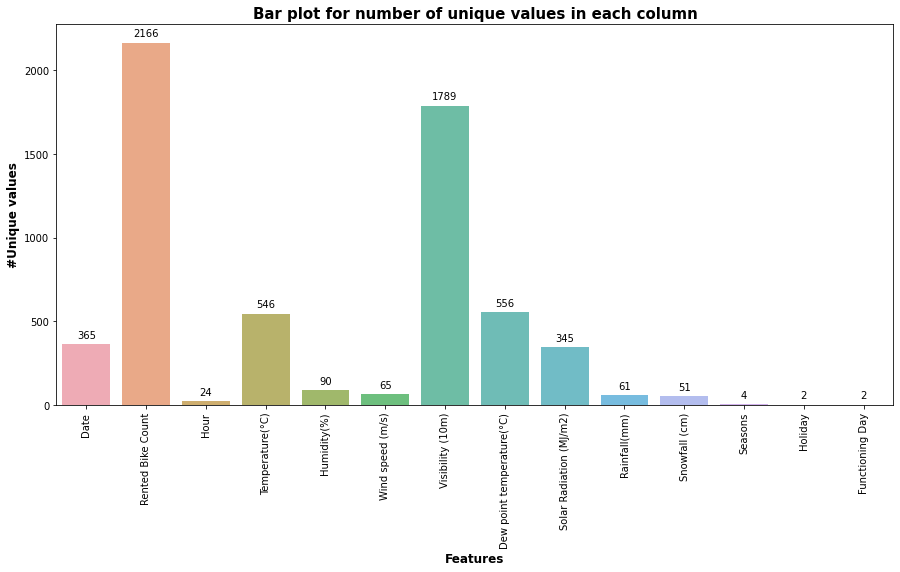

In [27]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Basic cleaning of the data**

**Misssing Values**





In [13]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

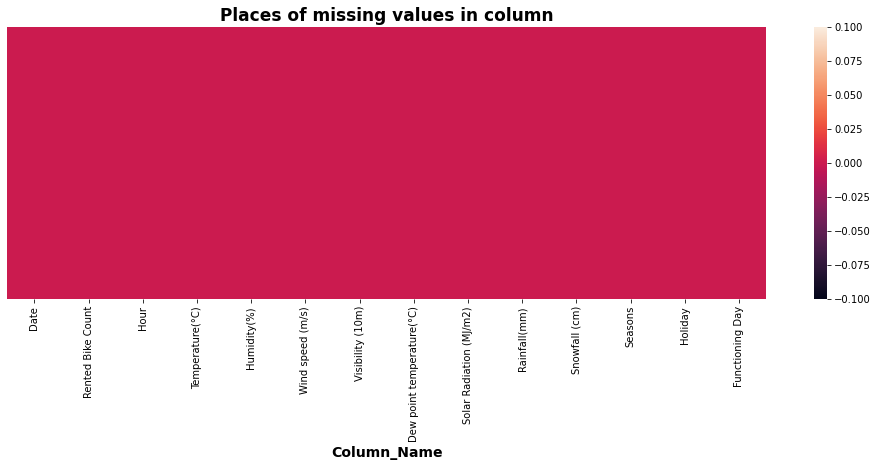

In [26]:
# No missin Values in our dataset
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**Duplicate Values**

In [14]:
# Checking duplicate
df.duplicated().sum()

0

As we can see in the above data there is no missng and duplicate value.

**Exploratory data analysis(EDA)**

**When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature**

In [20]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [16]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [17]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [18]:
categorical_features.head()

,Date,Hour,Seasons,Holiday,Functioning Day
0,01/12/2017,0,Winter,No Holiday,Yes
1,01/12/2017,1,Winter,No Holiday,Yes
2,01/12/2017,2,Winter,No Holiday,Yes
3,01/12/2017,3,Winter,No Holiday,Yes
4,01/12/2017,4,Winter,No Holiday,Yes
